In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obspy.core.utcdatetime import UTCDateTime

In [23]:
# Load your earthquake catalog from a CSV file using pandas
data = pd.read_csv("/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/ryu_kur_class_by_loc_net.csv")  # Replace with your CSV file

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [30]:
def gardner_knopoff_decluster(df, mainshock_window=100, aftershock_window=10, magnitude_ratio=1.5):
    # Sort the DataFrame by time
    df.sort_values(by='DATE', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Initialize lists to store mainshocks and aftershocks
    mainshocks = []
    aftershocks = []

    for i, row in df.iterrows():
        if not mainshocks:
            mainshocks.append(i)
            continue

        mainshock_idx = mainshocks[-1]
        event_time = UTCDateTime(row['DATE'])
        mainshock_time = UTCDateTime(df.at[mainshock_idx, 'DATE'])

        if (event_time - mainshock_time) > mainshock_window:
            mainshocks.append(i)
        elif (event_time - mainshock_time) <= aftershock_window and row['MW'] >= magnitude_ratio * df.at[mainshock_idx, 'MW']:
            aftershocks.append(i)
    
    return mainshocks, aftershocks

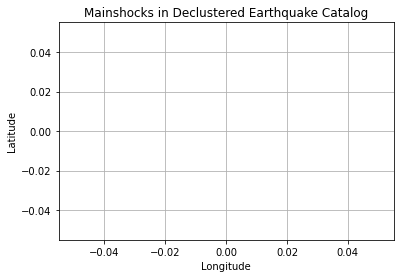

In [33]:
# Decluster the earthquake catalog
mainshock_indices, aftershock_indices = gardner_knopoff_decluster(data)

# Create a new DataFrame for mainshocks
mainshock_df = data.loc[mainshock_indices]
aftershock_df = data.loc[aftershock_indices]

# Plot the declustered earthquake catalog
# plt.scatter(mainshock_df['LON'], mainshock_df['LAT'], s=20, c='blue', marker='o')
plt.scatter(aftershock_df['LON'], aftershock_df['LAT'], s=50, c='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mainshocks in Declustered Earthquake Catalog')
plt.grid(True)
plt.show()